In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
import seaborn as sns
from matplotlib import pyplot
import random
import numpy as np

In [2]:
# Bokeh libraries
from bokeh.io import output_file, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column, gridplot
from bokeh.models.widgets import Tabs, Panel

In [3]:
url="https://tinyurl.com/ChrisCoDV/001202158/VenueDailyVisitors.csv"
dfDailyVisitor=pd.read_csv(url)

In [5]:
url1 = 'https://tinyurl.com/ChrisCoDV/001202158/VenueAge.csv '
dfVenAge = pd.read_csv(url1)

url2 = 'https://tinyurl.com/ChrisCoDV/001202158/VenueDistance.csv'
dfAveAge = pd.read_csv(url2)

url3 = 'https://tinyurl.com/ChrisCoDV/001202158/VenueDuration.csv'
dfDistance = pd.read_csv(url3)

url4 = 'https://tinyurl.com/ChrisCoDV/001202158/VenueGender.csv'
dfVanGender = pd.read_csv(url4)

url5 = 'https://tinyurl.com/ChrisCoDV/001202158/VenueSpend.csv'
dfTimeSpend = pd.read_csv(url5)

First Dataframe is the daily visitor's data for each venue. It has been shown below

In [7]:
dfDailyVisitor

,Date,ZLH,RDA,ZJB,SJU,TRV,ZPL,BKI,WFI,AWF,...,XPE,QJL,YVW,CWN,YXF,YDI,XJT,UZO,AEQ,AXM
0,2019-01-01,65,617,0,569,91,64,0,95,184,...,66,237,0,237,75,0,81,75,0,75
1,2019-01-02,75,731,0,573,67,62,0,66,169,...,75,325,0,220,68,0,89,56,0,48
2,2019-01-03,61,545,0,448,67,62,0,94,128,...,79,228,0,194,71,0,78,79,0,95
3,2019-01-04,74,319,0,396,64,51,0,62,92,...,81,220,0,139,80,0,78,63,0,78
4,2019-01-05,54,449,0,388,78,63,0,91,96,...,80,167,0,152,76,0,80,65,0,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,59,447,68,392,84,0,66,74,105,...,61,126,51,105,73,113,68,69,81,66
361,2019-12-28,80,438,62,440,86,0,148,91,83,...,72,139,108,164,80,110,76,58,55,49
362,2019-12-29,61,634,67,464,82,0,41,90,136,...,85,178,82,188,82,48,82,78,34,52
363,2019-12-30,66,729,66,565,76,0,27,93,171,...,82,245,79,220,77,57,90,64,69,69


## Joining each individual data we get from tinyurl link

This would be our second dataframe comprising of VenueAge.csv, VenueDistance.csv, VenueDuration.csv, VenueGender.csv, and VenueSpend.csv 

In [8]:
dfM1 = dfVenAge.merge(dfAveAge, how='left')
dfM2 = dfM1.merge(dfDistance,how = 'left')
dfM3 = dfM2.merge(dfVanGender,how = 'left')
dfMerge = dfM3.merge(dfTimeSpend)
dfMerge.head()

,Id,Avg age (yrs),Max travel distance (mls),Avg visit duration (mins),Proportion Female (%),Avg spend (£)
0,ZLH,39,7,75,44,20
1,RDA,26,47,112,48,19
2,ZJB,54,3,94,45,34
3,SJU,51,25,68,41,29
4,TRV,55,9,90,53,23


## Getting Monthly Average of all Visitors

In [9]:
dfDailyVisitor['Date'] = pd.to_datetime(dfDailyVisitor['Date'])
dfMonthlyAverage = dfDailyVisitor.resample('M', on='Date').mean()
dfMonthlyAverage.head()

,ZLH,RDA,ZJB,SJU,TRV,ZPL,BKI,WFI,AWF,DKS,...,XPE,QJL,YVW,CWN,YXF,YDI,XJT,UZO,AEQ,AXM
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-31,69.612903,526.322581,0.000000,483.387097,72.903226,62.451613,0.0,82.741935,137.967742,161.225806,...,75.967742,220.451613,0.0,197.193548,75.903226,0.0,80.838710,66.806452,0.0,62.516129
2019-02-28,69.857143,526.321429,0.000000,481.285714,74.142857,64.428571,0.0,84.321429,136.607143,161.321429,...,76.250000,225.285714,0.0,185.000000,78.428571,0.0,81.285714,67.857143,0.0,60.607143
2019-03-31,67.354839,536.419355,0.000000,476.967742,74.806452,67.516129,0.0,83.870968,136.193548,150.838710,...,75.903226,205.225806,0.0,191.387097,76.709677,0.0,79.516129,66.322581,0.0,64.580645
2019-04-30,71.033333,525.700000,7.233333,491.266667,73.600000,65.633333,0.0,85.566667,140.633333,157.233333,...,76.933333,211.866667,0.0,189.666667,76.100000,0.0,76.133333,68.133333,0.0,62.800000
2019-05-31,70.129032,507.096774,13.645161,485.677419,75.322581,67.161290,0.0,86.903226,140.064516,150.677419,...,74.290323,210.967742,0.0,187.806452,75.032258,0.0,80.580645,67.806452,0.0,63.387097


In [10]:
dfMonthlyAverage.columns

Index(['ZLH', 'RDA', 'ZJB', 'SJU', 'TRV', 'ZPL', 'BKI', 'WFI', 'AWF', 'DKS',
       'XLA', 'XXO', 'WDZ', 'VLS', 'XFP', 'YRU', 'QRY', 'GLQ', 'VRD', 'PDT',
       'WXV', 'PXI', 'SPF', 'UFY', 'WRL', 'TLJ', 'CQC', 'BEY', 'ZFX', 'BQV',
       'XPE', 'QJL', 'YVW', 'CWN', 'YXF', 'YDI', 'XJT', 'UZO', 'AEQ', 'AXM'],
      dtype='object')

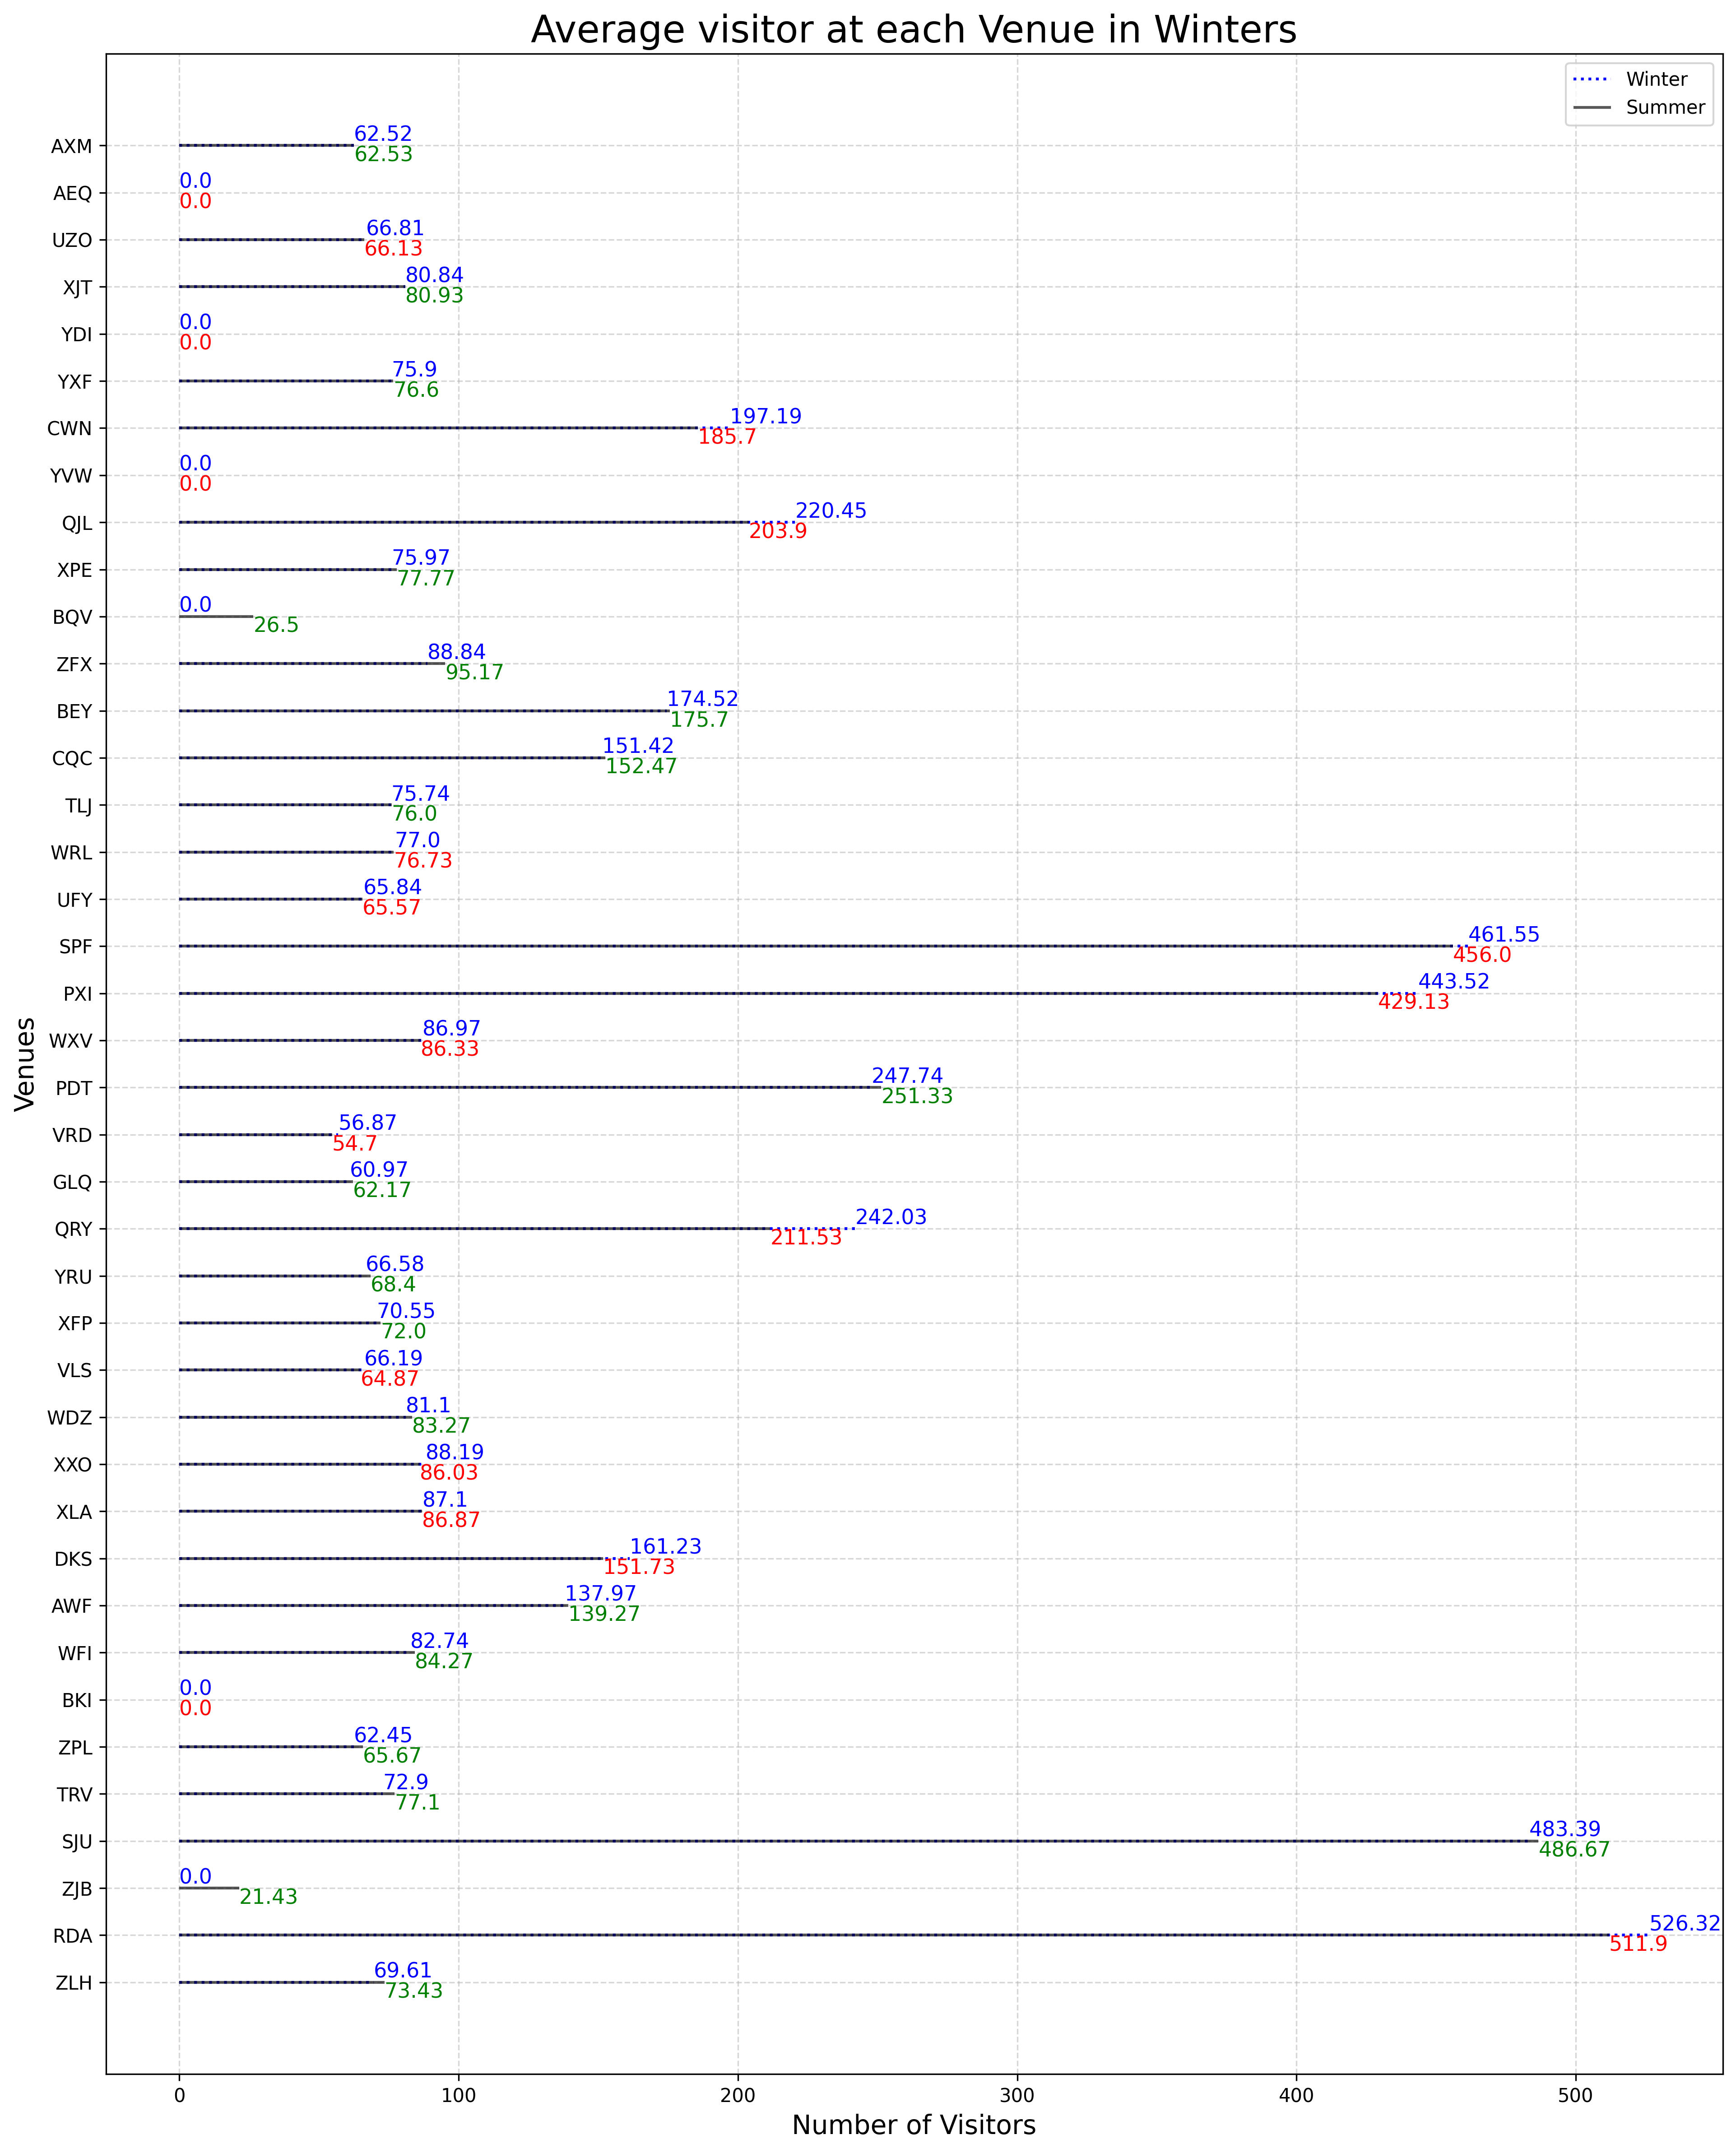

In [12]:
mylabels = dfMonthlyAverage.columns
Jan = dfMonthlyAverage.iloc[0]
Jun = dfMonthlyAverage.iloc[5]

plt.figure(figsize=(13,16), dpi = 300)
plt.hlines(y=Jan.index, xmin=0, xmax=Jan, linestyles = 'dotted', color = 'blue', label = 'Winter')
plt.hlines(y=Jun.index, xmin=0, xmax=Jun, color = 'black', alpha = 0.65, label = 'Summer')

for x, y, tex in zip(Jan, Jan.index, Jan):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='left',
                 verticalalignment='bottom', fontdict={'color': 'blue', 'size':11})

for x, y, tex, x1 in zip(Jun, Jun.index, Jun, Jan):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='left',
                 verticalalignment='top', fontdict={'color':'green' if x > x1 else 'red', 'size':11})
    
plt.title('Average visitor at each Venue in Winters',fontsize = 20)
plt.xlabel('Number of Visitors', fontsize = 14)
plt.ylabel('Venues', fontsize = 14)
plt.grid(linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

### Number of Visitor at ZLH throughout the year. 

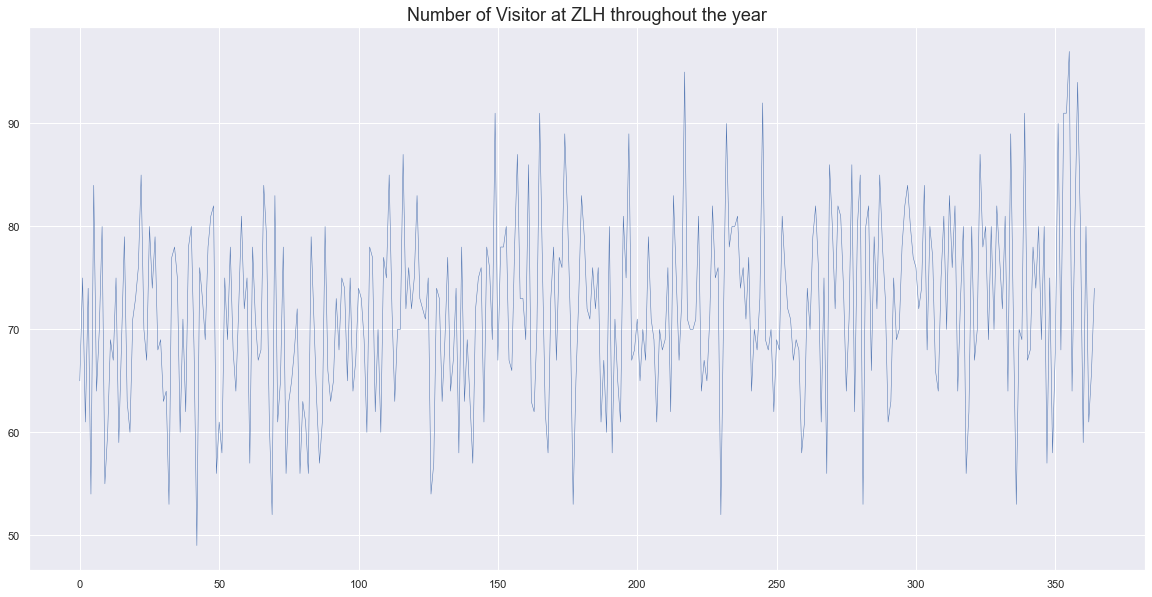

In [13]:
sns.set(rc={'figure.figsize':(20, 10)})
dfDailyVisitor['ZLH'].plot(linewidth=0.5)
plt.title('Number of Visitor at ZLH throughout the year', fontsize = 18)
plt.show()

### Female Proportion at each Venues

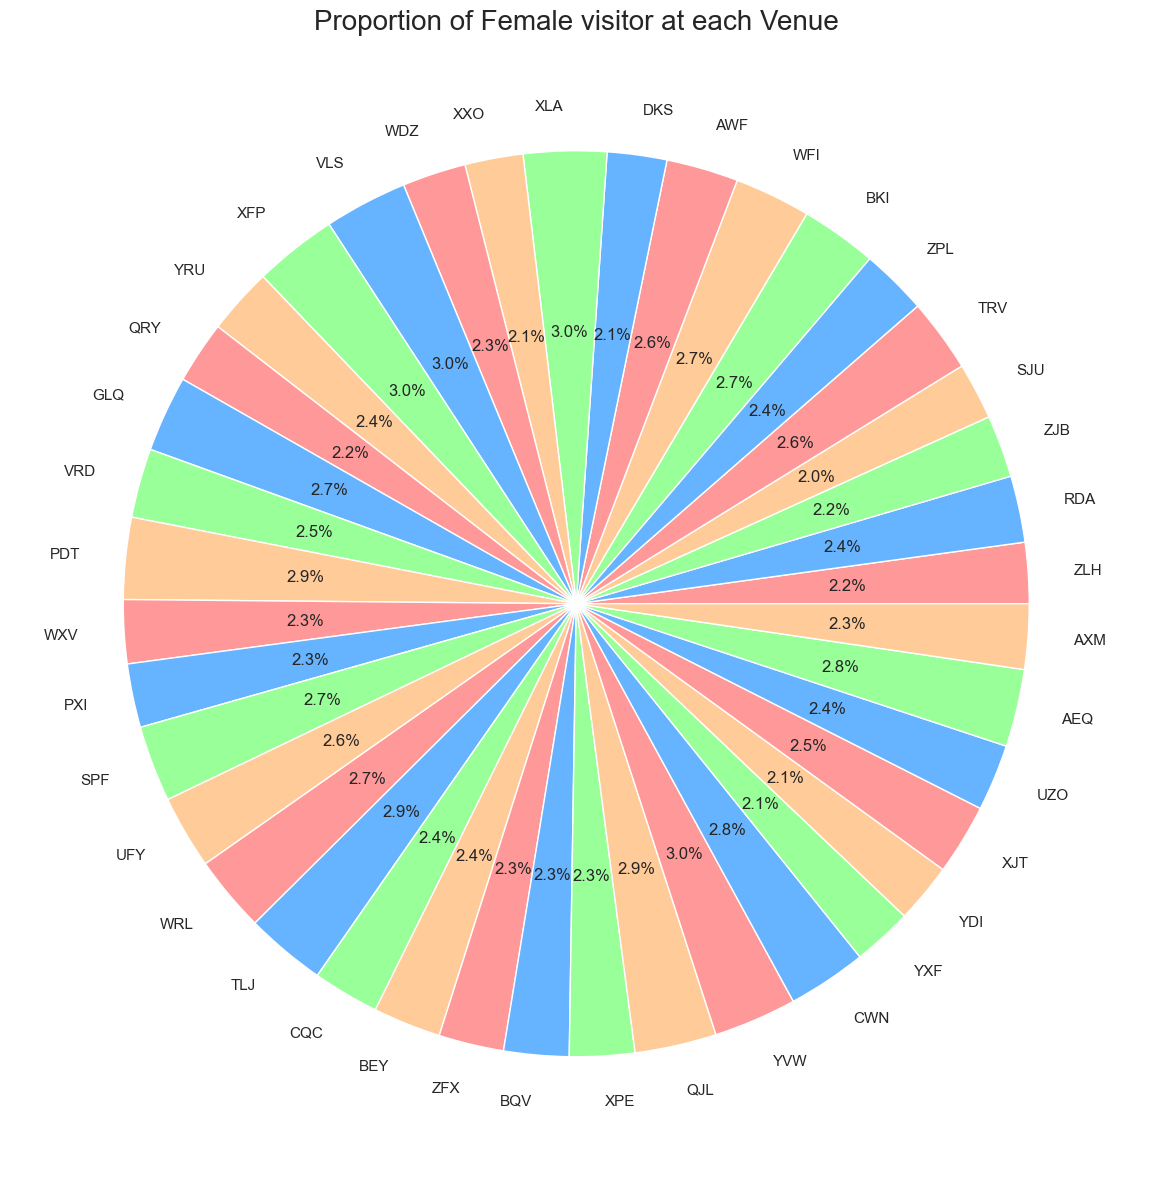

In [14]:
plt.figure(figsize=(15, 15),dpi=100)
mylabels = dfMerge['Id'].unique()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(dfMerge['Proportion Female (%)'],labels = mylabels,autopct='%1.1f%%',colors=colors)
plt.title('Proportion of Female visitor at each Venue',fontsize=20)
plt.show()

From the figure we can see that "YVW","XLA", "VLS", "XFP" have the highest percentage of female visitors than all other venues. 

### Average Visit Duration at each Venue

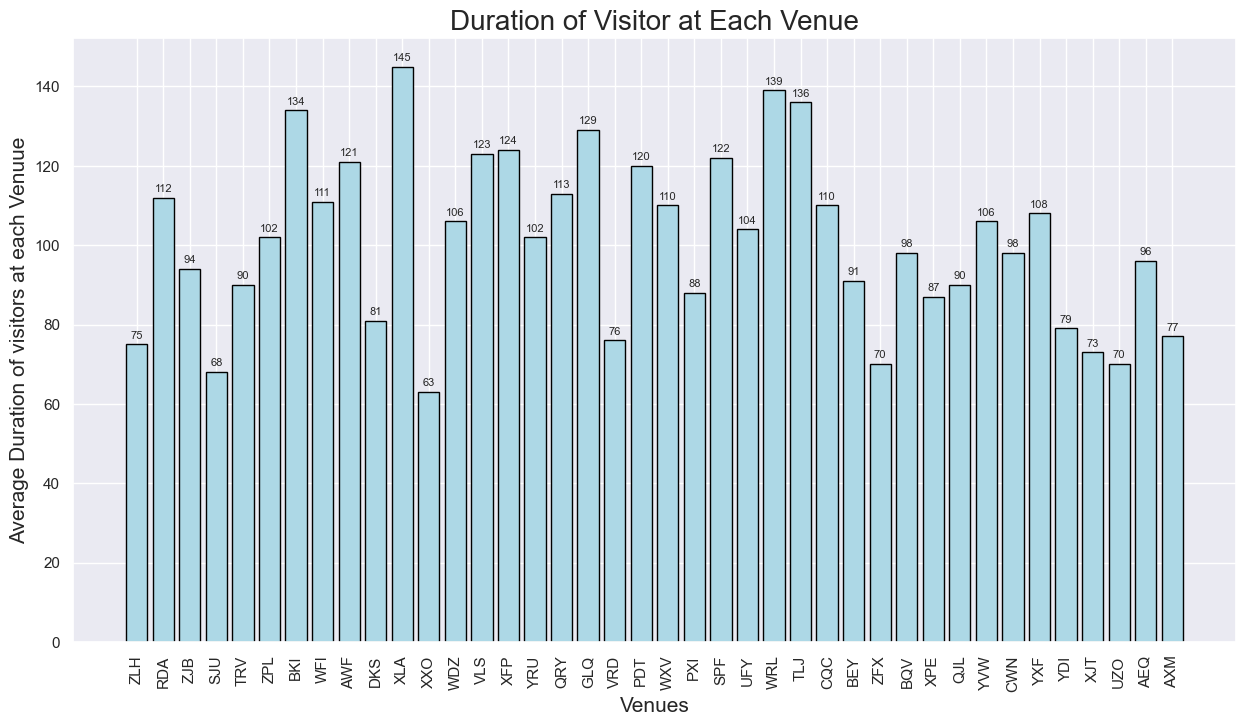

In [15]:
plt.figure(figsize=(15, 8),dpi=100)

bar1 = plt.bar(dfMerge['Id'],dfMerge['Avg visit duration (mins)'], color = 'lightblue', edgecolor = 'black')
plt.bar_label(bar1, padding=3, fontsize=8)

plt.xlabel('Venues',fontsize=15)
plt.xticks(rotation=90) 
plt.ylabel('Average Duration of visitors at each Venuue',fontsize=15)
plt.title('Duration of Visitor at Each Venue',fontsize=20)

plt.show()

### Average Age of Visitors at each Venue

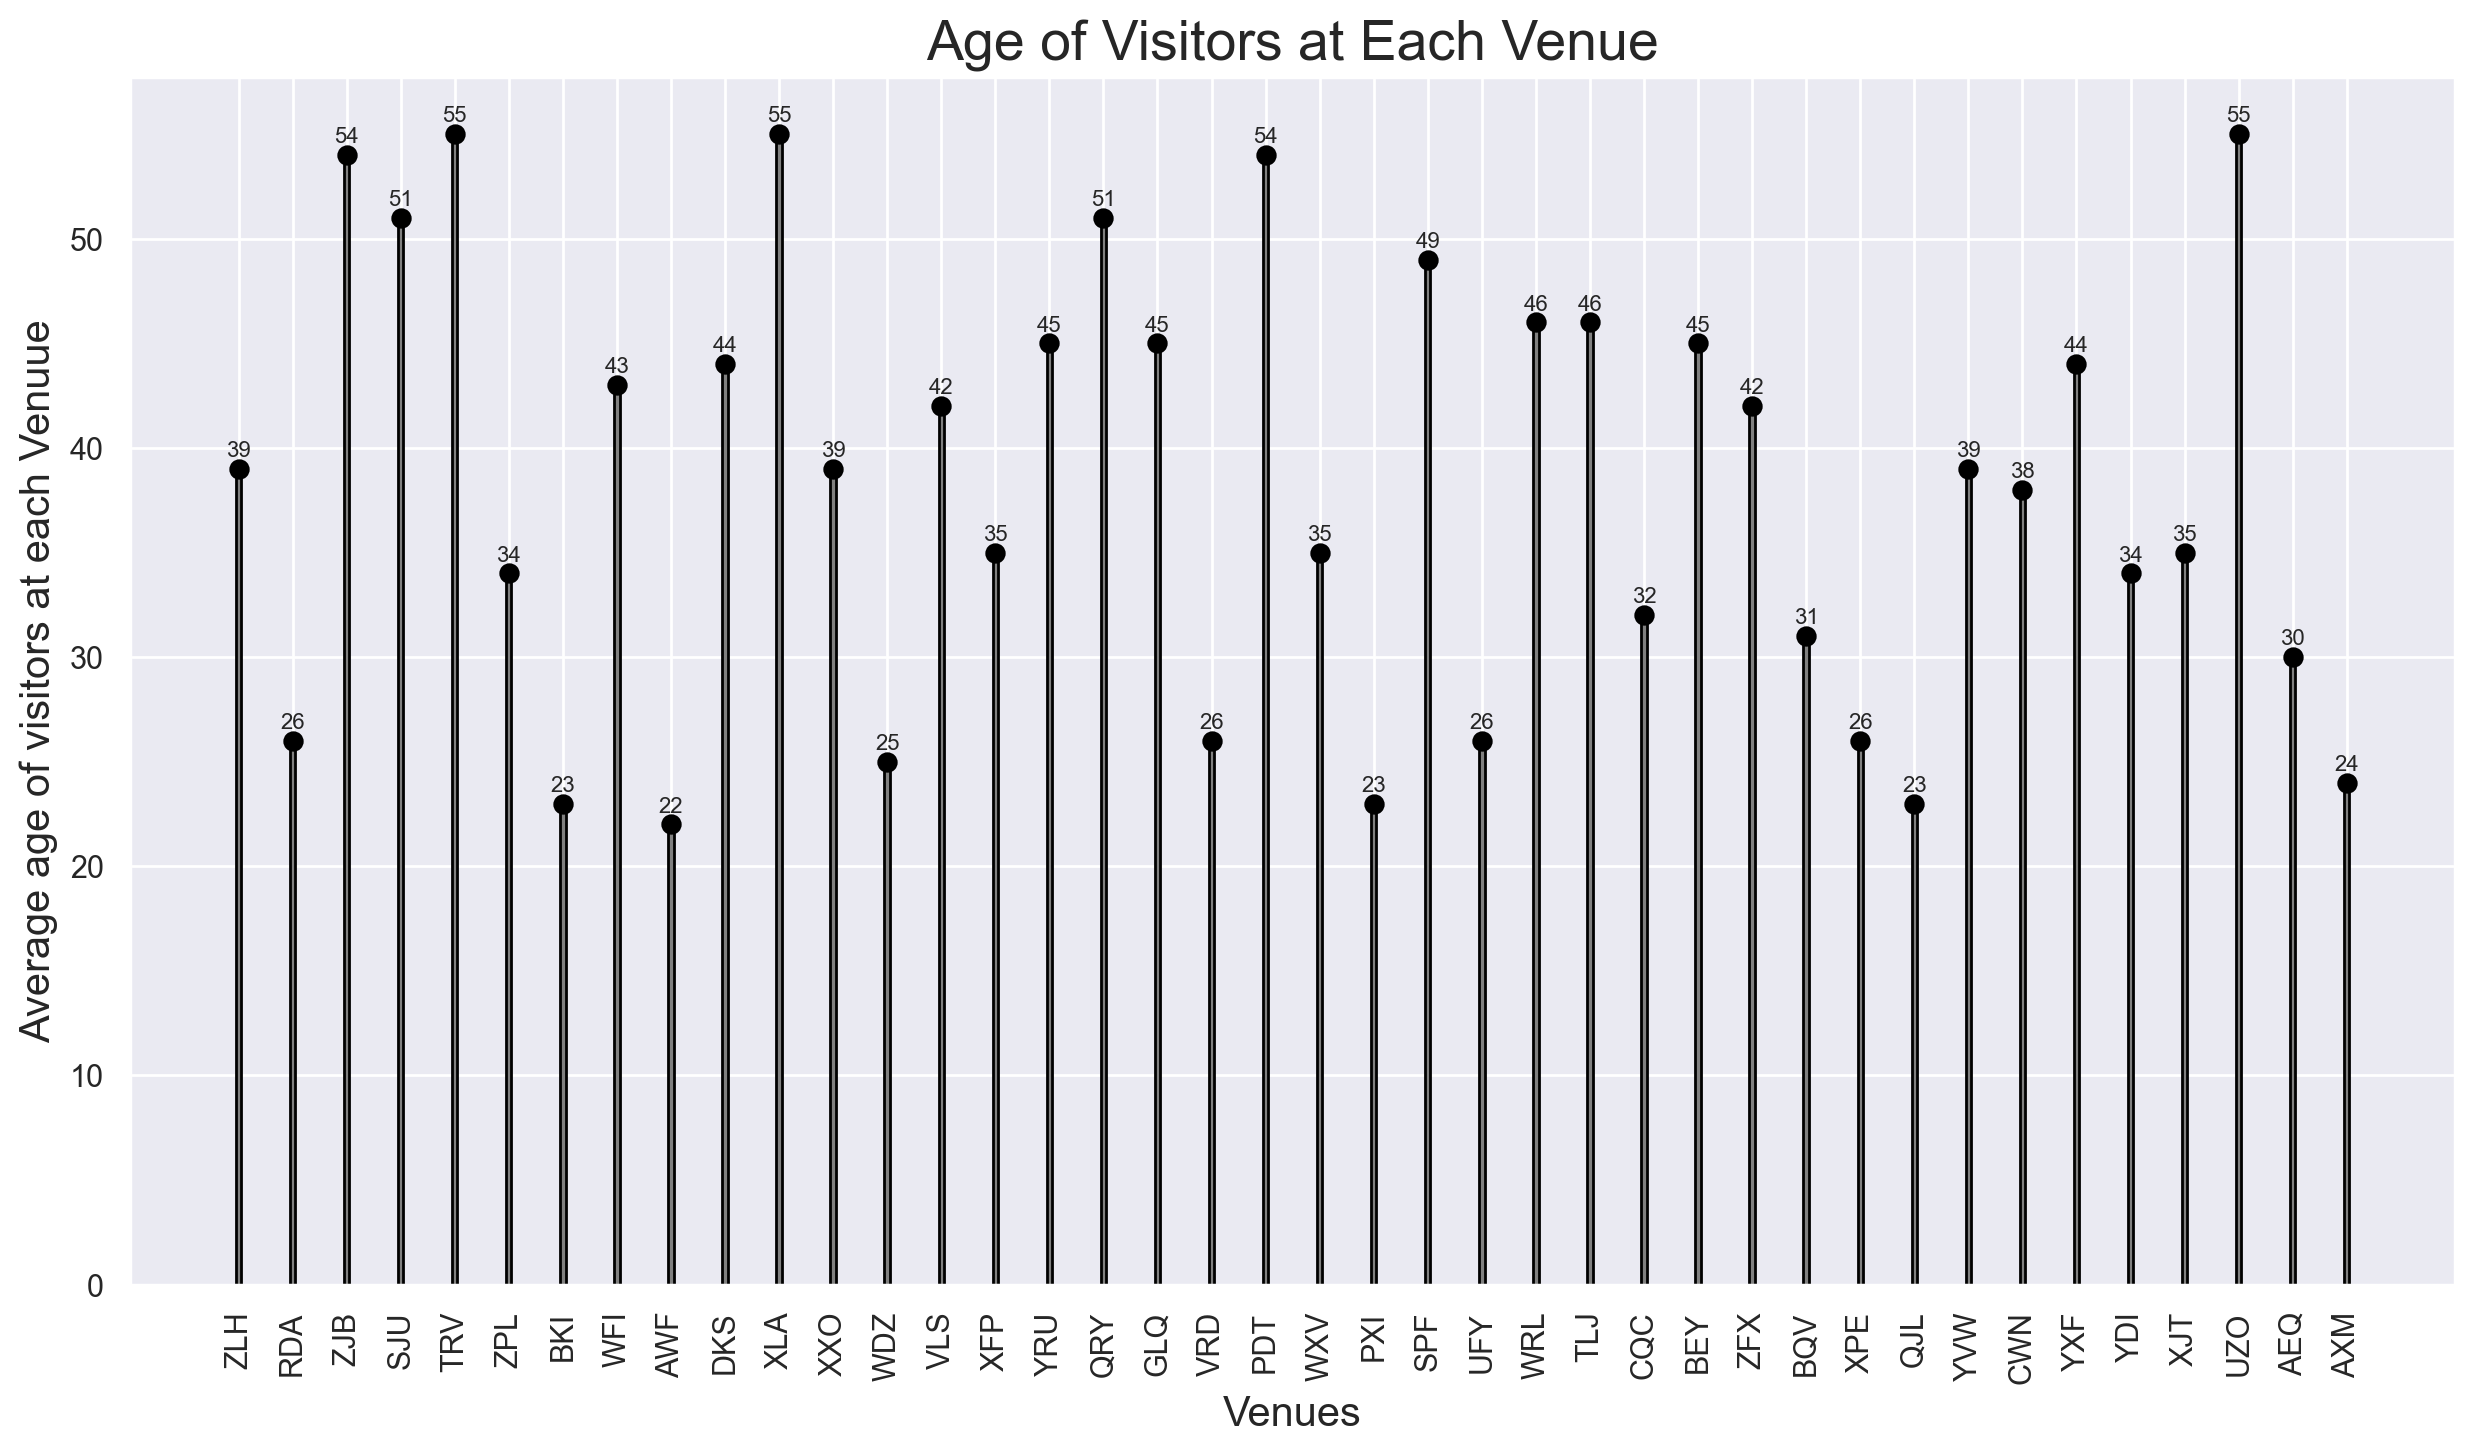

In [16]:
plt.figure(figsize=(15, 8),dpi=200)

bar1 = plt.bar(dfMerge['Id'],dfMerge['Avg age (yrs)'], color = 'gray', edgecolor = 'black', width = 0.1)
plt.scatter(dfMerge['Id'],dfMerge['Avg age (yrs)'], color = 'black', s=40)
plt.bar_label(bar1, padding=3, fontsize=8)

plt.xlabel('Venues',fontsize=15)
plt.xticks(rotation=90) 
plt.ylabel('Average age of visitors at each Venuue',fontsize=15)
plt.title('Age of Visitors at Each Venue',fontsize=20)
plt.show()

### Average Money Spend at each Venue

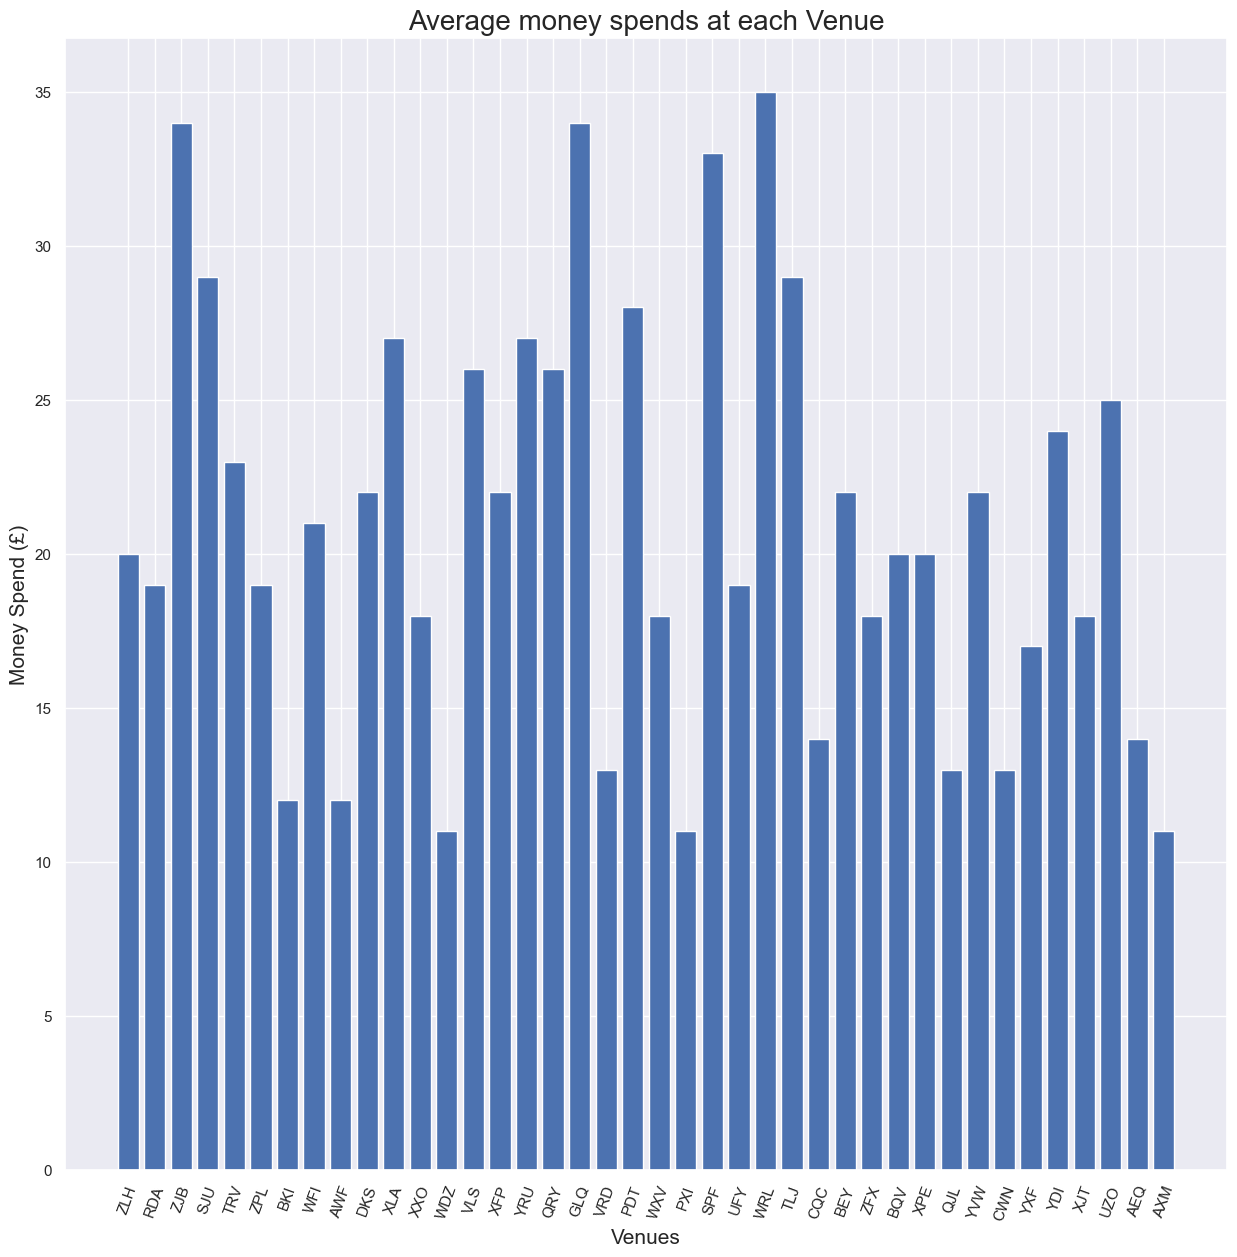

In [18]:
plt.figure(figsize=(15, 15),dpi=100)
plt.bar(dfMerge['Id'],dfMerge['Avg spend (£)'],)
plt.xlabel('Venues',fontsize=15)
plt.xticks(rotation=70) 
plt.ylabel('Money Spend (£)',fontsize=15)
plt.title('Average money spends at each Venue',fontsize=20)
plt.show()

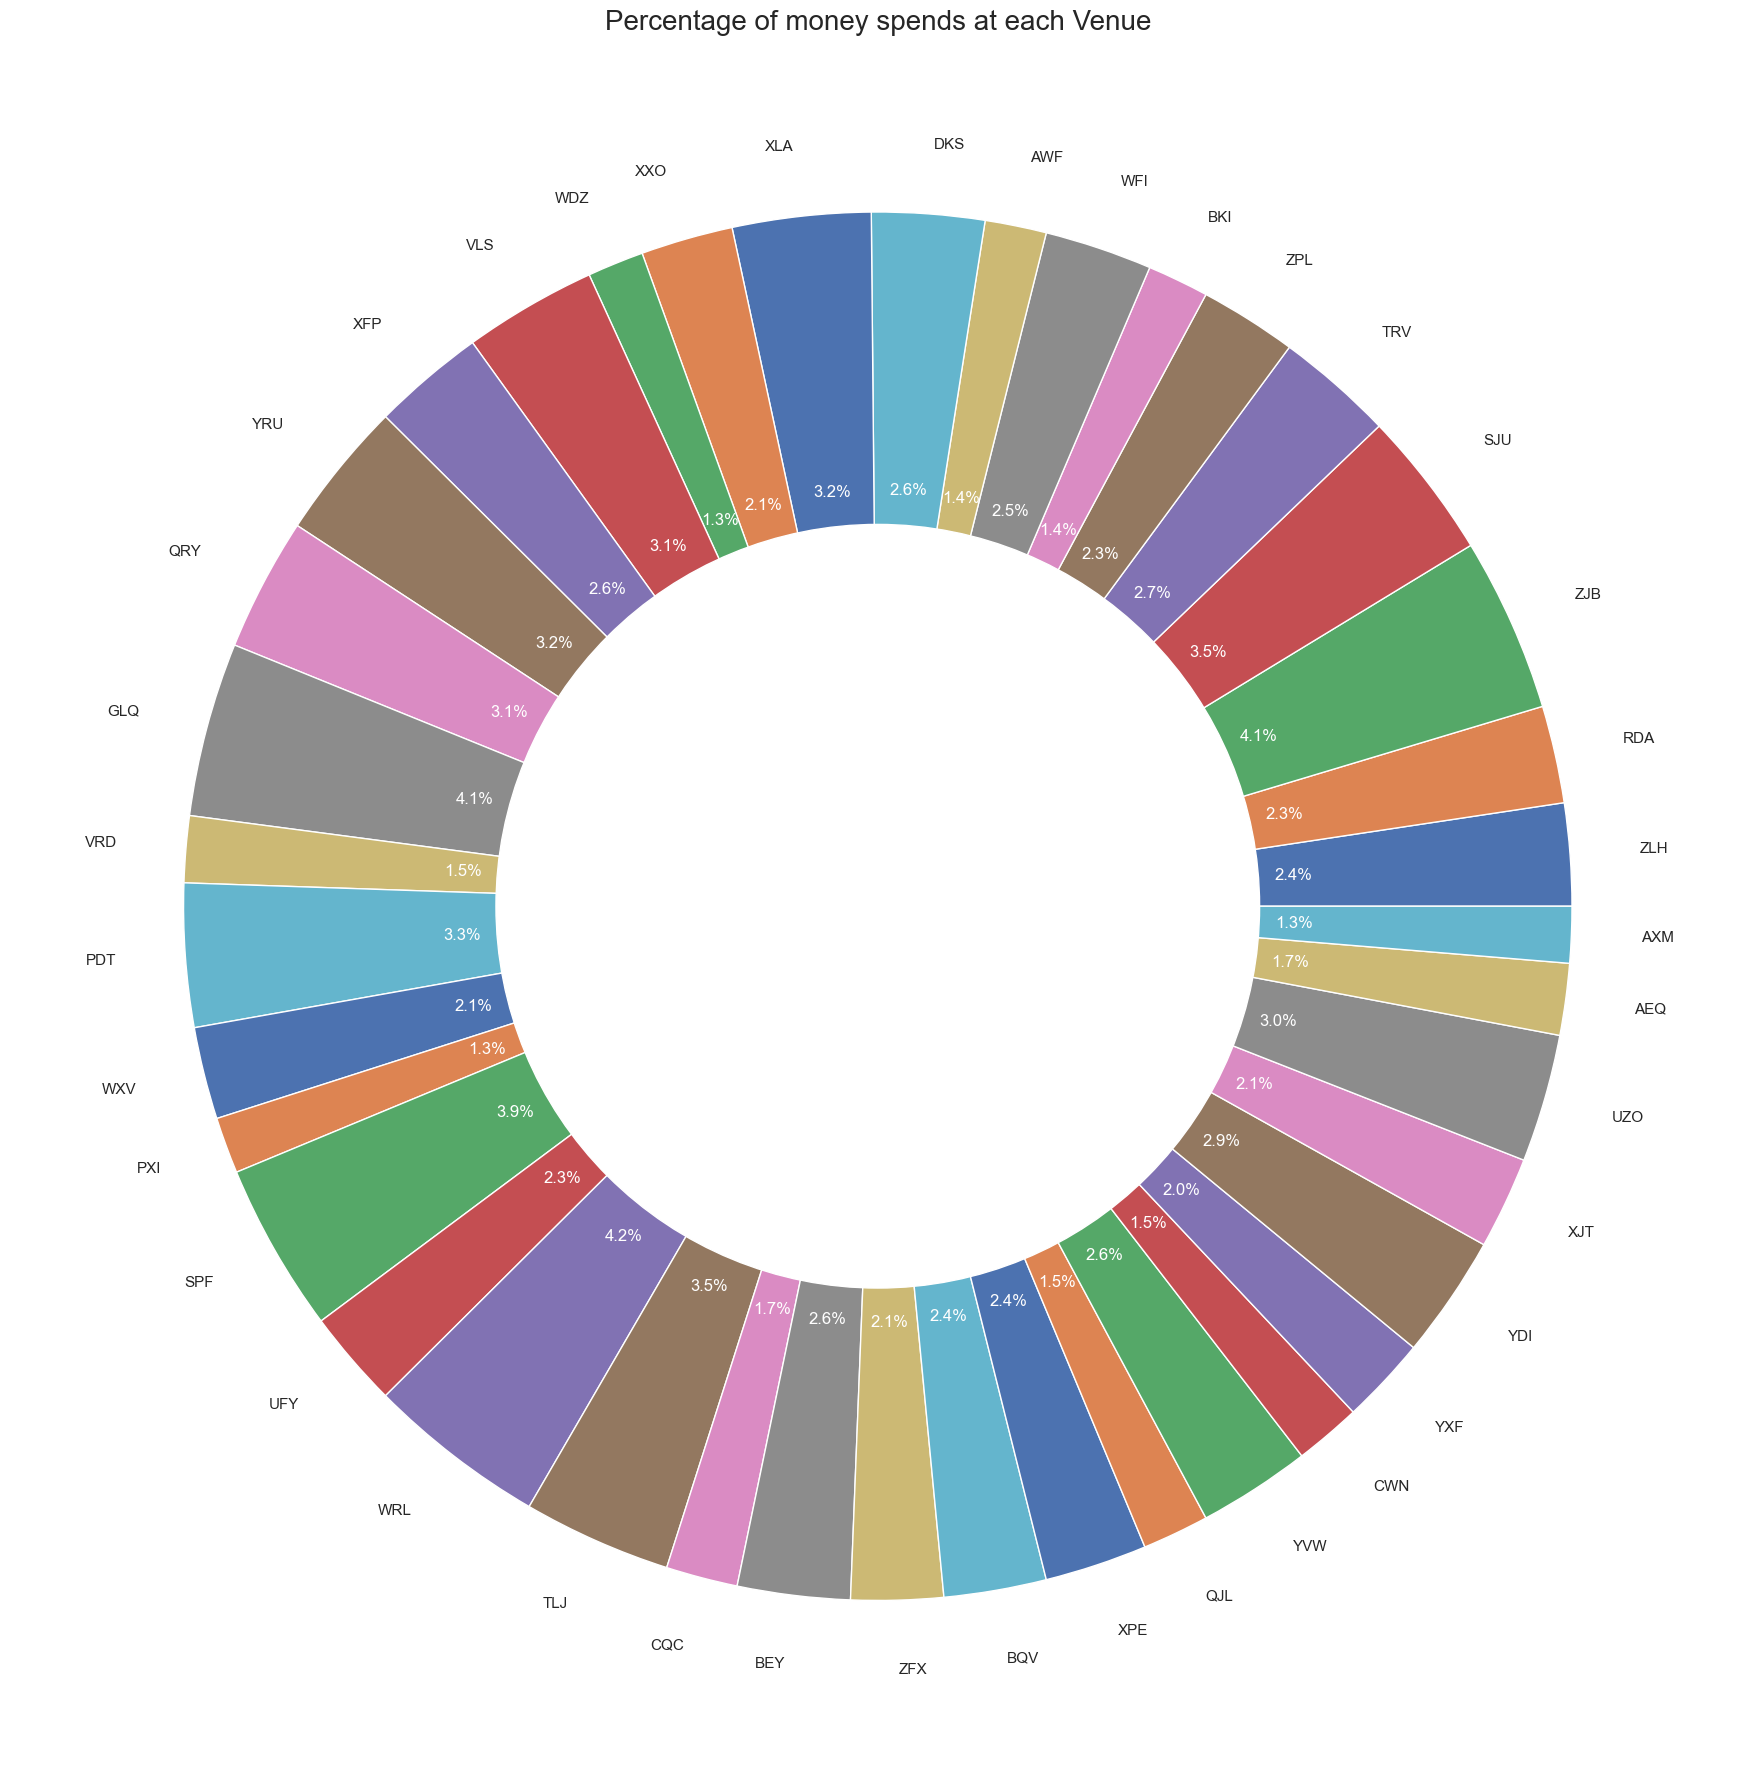

In [19]:
plt.figure(figsize=(18, 18),dpi=100)
total = sum(dfMerge['Avg spend (£)'])
data_per = (dfMerge['Avg spend (£)']/total)*100
_, _, autotexts = plt.pie(dfMerge['Avg spend (£)'],labels = dfMerge['Id'],autopct="%.1f%%")
for autotext in autotexts:
    autotext.set_color('white')
    
circle = plt.Circle( (0,0), 0.55, color='white')
plt.title('Percentage of money spends at each Venue',fontsize=20)
p=plt.gcf()
p.gca().add_artist(circle)
plt.tight_layout()
plt.show()

### Max travel distance (mls) at each Venue

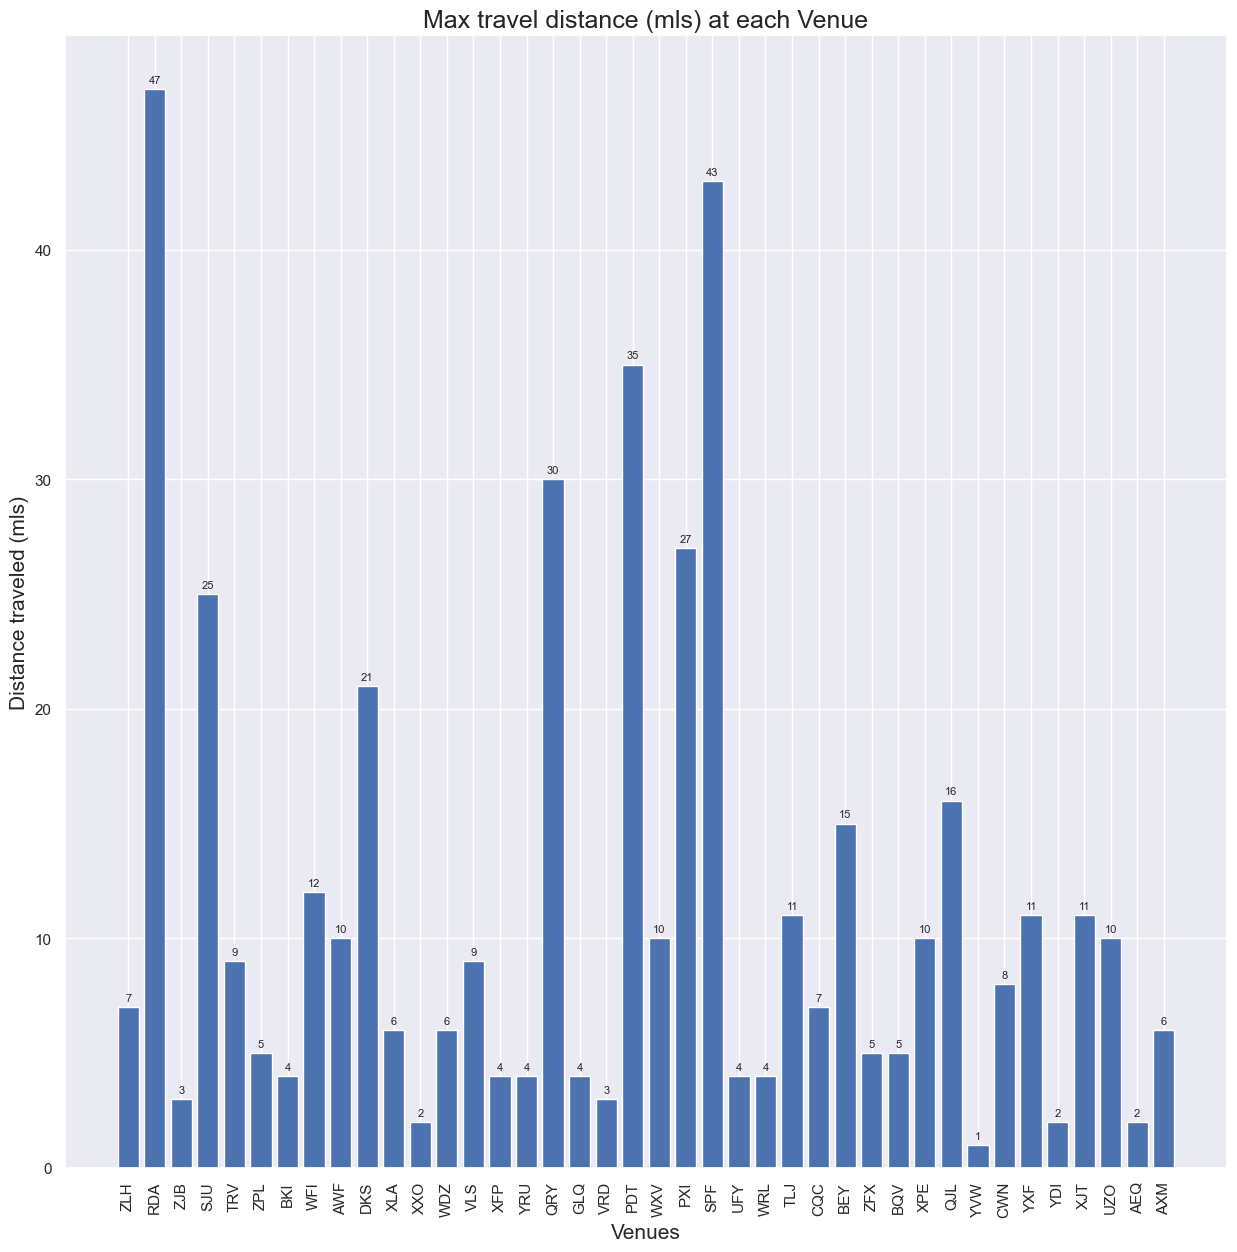

In [20]:
plt.figure(figsize=(15, 15),dpi=100)

bar1 = plt.bar(dfMerge['Id'],dfMerge['Max travel distance (mls)'])
plt.bar_label(bar1, padding=3, fontsize=8)

plt.xlabel('Venues',fontsize=15)
plt.xticks(rotation=90) 
plt.ylabel('Distance traveled (mls)',fontsize=15)
plt.title('Max travel distance (mls) at each Venue',fontsize=18)
plt.savefig('distance.jpeg')
plt.show()

### Relationship between Age and Average money Spend

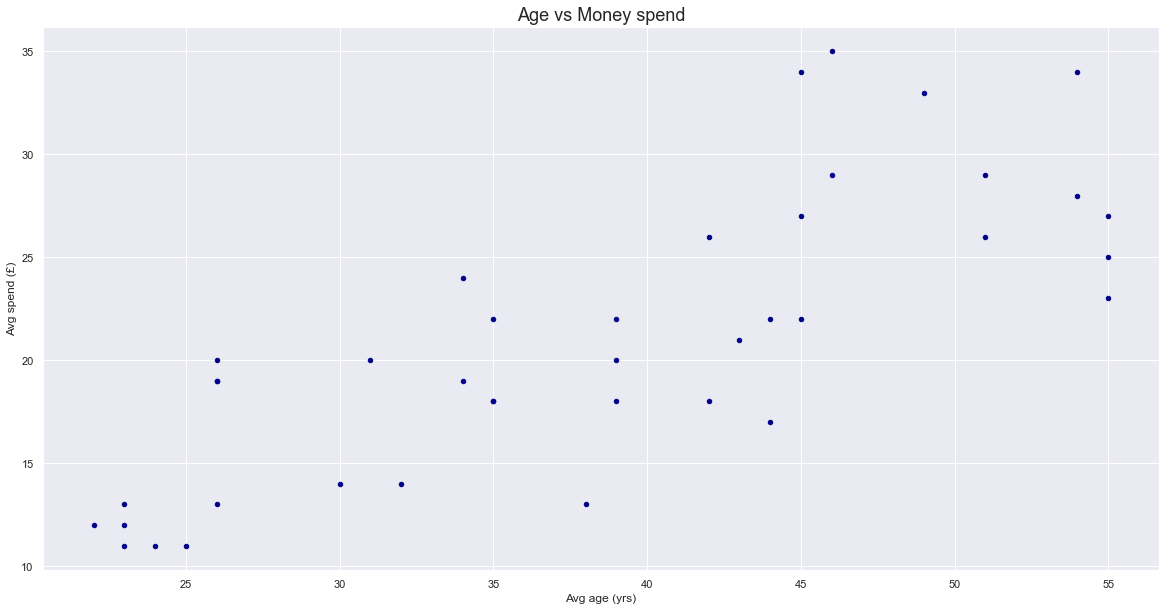

In [25]:
ax1 = dfMerge.plot.scatter(x='Avg age (yrs)',
                           y='Avg spend (£)',
                           c='DarkBlue')
plt.title("Age vs Money spend", fontsize = 18)
plt.show()

#### Making above Plot Interactive

In [26]:
# file to save the model
output_file("gfg.html")
        
# instantiating the figure object
graph = figure(title = "Bokeh Scatter Graph")

graph.xaxis.axis_label = "Average age (yrs)"
       
# name of the y-axis 
graph.yaxis.axis_label = "Average Money spend"


# the points to be plotted
x = dfMerge['Avg age (yrs)']
y = dfMerge['Avg spend (£)']
#z = dfMerge['Proportion Female (%)']
     
# plotting the graph
graph.scatter(x, y)
      
# displaying the model
show(graph)

### Relationship between Femal percentage vs Duration spend at each Venue

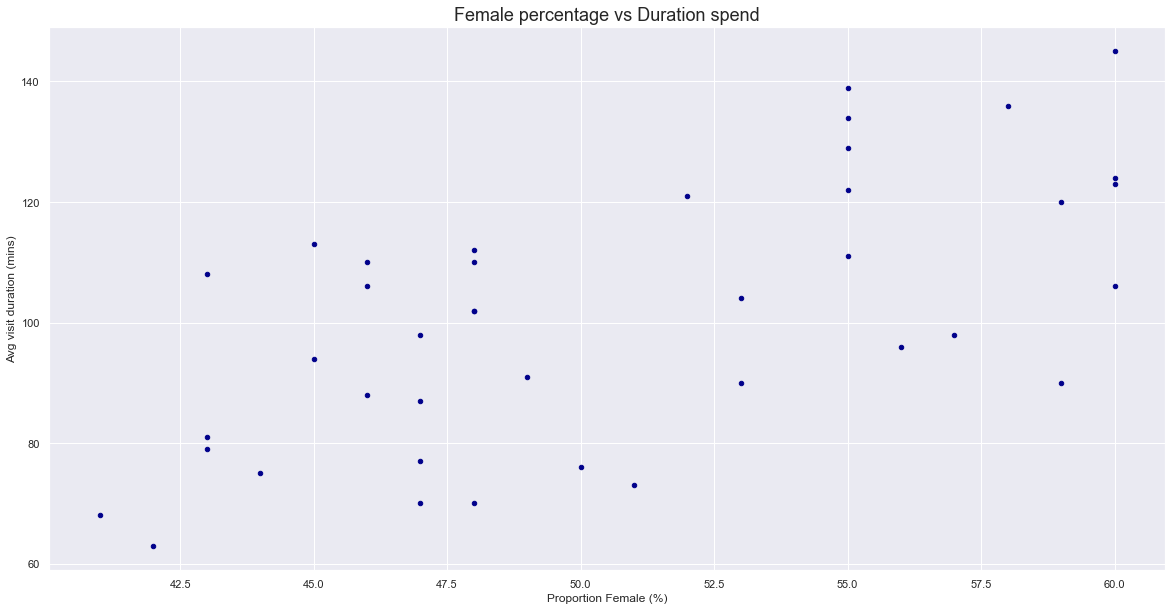

In [30]:
ax1 = dfMerge.plot.scatter(x='Proportion Female (%)',
                           y='Avg visit duration (mins)',
                           c='DarkBlue')
plt.title("Female percentage vs Duration spend", fontsize = 18)
plt.show()

#### Making above Plot interactive

In [31]:
        
# file to save the model
output_file("gfg.html")
        
# instantiating the figure object
graph = figure(title = "Bokeh Scatter Graph")
graph.xaxis.axis_label = "Female Percentage"
       
# name of the y-axis 
graph.yaxis.axis_label = "Avg Duration of Visit"

# the points to be plotted
x = dfMerge['Proportion Female (%)']
y = dfMerge['Avg visit duration (mins)']
     
# plotting the graph
graph.scatter(x, y)
      
# displaying the model
show(graph)

### Relationship between Femal percentage vs Money spend at that Venue

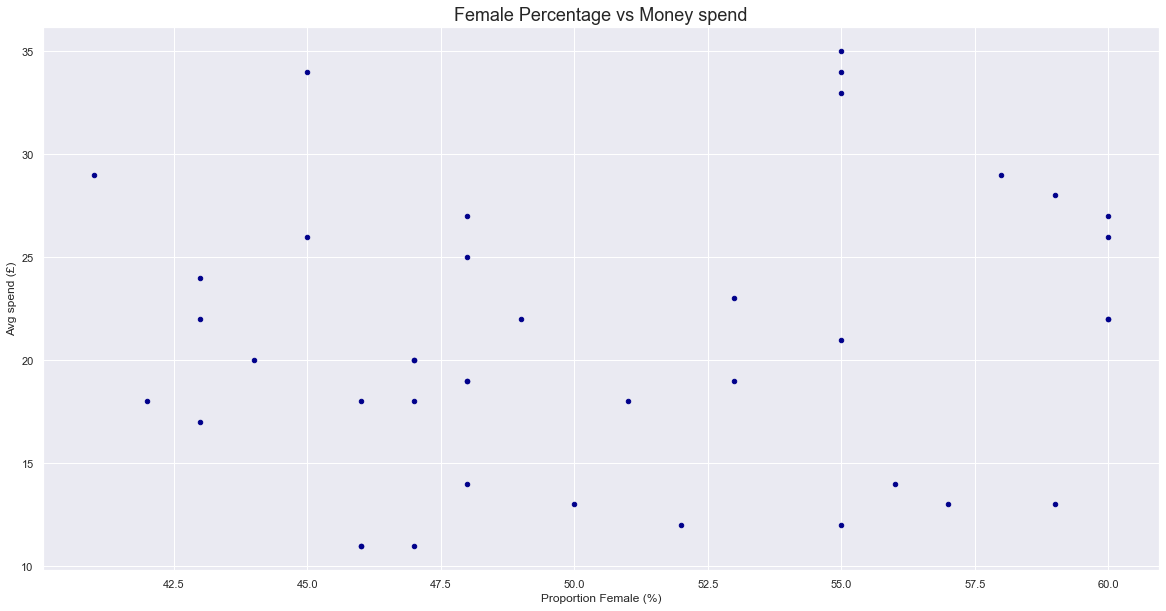

In [32]:
ax1 = dfMerge.plot.scatter(x='Proportion Female (%)',
                           y='Avg spend (£)',
                           c='DarkBlue')
plt.title("Female Percentage vs Money spend", fontsize = 18)
plt.show()

#### Making Above Plot Interactive

In [33]:
# file to save the model
output_file("gfg.html")

# instantiating the figure object
graph = figure(title = "Bokeh Interactive Graph of Relationship between Female proportion and Average Money spend")

graph.xaxis.axis_label = "Female Percentage"
       
# name of the y-axis 
graph.yaxis.axis_label = "Avg Money Spend"
               
# the points to be plotted
x = dfMerge['Proportion Female (%)']
y = dfMerge['Avg spend (£)']
     
# plotting the graph
graph.scatter(x, y)
# displaying the model
show(graph)